In [11]:
from torch_snippets import *
from utils.utils import load_model
from model import SiameseNetwork, ContrastiveLoss
from dataset import SiameseNetworkDataset
from main import val_ds

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [7]:
model = SiameseNetwork().to(device)
criterion = ContrastiveLoss()
optimizer = optim.Adam(model.parameters(),lr = 3e-4)

In [9]:
model, optimizer, loss = load_model(model=model,optimizer=optimizer)

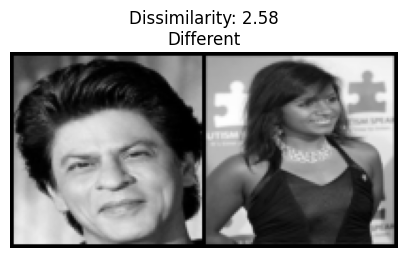

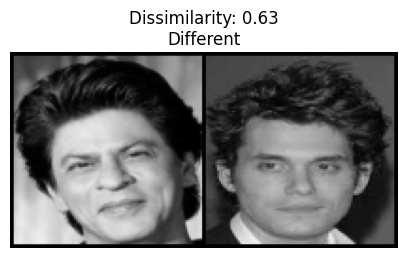

In [19]:
model.eval()
val_dl = DataLoader(val_ds,batch_size=1, \
                    shuffle=True)
dataiter = iter(val_dl)
x0, _, _ = next(dataiter)
for i in range(2):
    _, x1, label2 = next(dataiter)
    concatenated = torch.cat((x0*0.5+0.5, x1*0.5+0.5),0)
    output1,output2 = model(x0.cuda(),x1.cuda())
    euclidean_distance = F.pairwise_distance(output1, output2)
    output = 'Same Face' if euclidean_distance.item() < 0.6 \
    else 'Different'
    show(torchvision.utils.make_grid(concatenated), \
         title='Dissimilarity: {:.2f}\n{}'. \
         format(euclidean_distance.item(), output))
    plt.show()